#### Leaf Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib import pyplot

In [3]:
train = pd.read_csv('/Users/dylanhayashi/Desktop/422 - Machine Learning/Module 8/leaf-classification/train.csv')
test = pd.read_csv('/Users/dylanhayashi/Desktop/422 - Machine Learning/Module 8/leaf-classification/test.csv')

#### EDA

In [4]:
# Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [5]:
# Describe
train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [6]:
# Missing Values
print(f'There are {train.isnull().sum().sum()} missing values in the training set.')
print(f'There are {test.isnull().sum().sum()} missing values in the test set.')

There are 0 missing values in the training set.
There are 0 missing values in the test set.


In [7]:
x_train = train.drop('species', axis = 1)
# Standardize
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train))

#### Y Train

In [71]:
# Create y_train from 'species' column of train
y_train = np.array(train.loc[:,'species'])
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)

#### X Train Pre-Processing

In [13]:
# Drop species column from x_train
x_train = train.drop('species', axis = 1)

In [14]:
# Standardize
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train))

In [188]:
# Create train, test, and validate sets
x_train_cv, x_valid_cv, y_train_cv, y_valid_cv = train_test_split(x_train_scaled, y_train_encoded,  test_size=0.4)

#### Test Set

In [191]:
# Standardize
scaler = StandardScaler()
scaler.fit(test)
test_scaled = pd.DataFrame(scaler.transform(test))

#### Model 1

Epoch 1/20
19/19 [==============================] - 2s 75ms/step - loss: 3.0091 - accuracy: 0.3485 - val_loss: 1.6150 - val_accuracy: 0.6414
Epoch 2/20
19/19 [==============================] - 1s 66ms/step - loss: 0.7636 - accuracy: 0.8956 - val_loss: 0.7583 - val_accuracy: 0.8965
Epoch 3/20
19/19 [==============================] - 1s 57ms/step - loss: 0.3264 - accuracy: 0.9899 - val_loss: 0.5556 - val_accuracy: 0.9091
Epoch 4/20
19/19 [==============================] - 1s 60ms/step - loss: 0.2008 - accuracy: 0.9933 - val_loss: 0.4116 - val_accuracy: 0.9545
Epoch 5/20
19/19 [==============================] - 1s 59ms/step - loss: 0.1413 - accuracy: 0.9983 - val_loss: 0.3712 - val_accuracy: 0.9571
Epoch 6/20
19/19 [==============================] - 1s 60ms/step - loss: 0.1070 - accuracy: 1.0000 - val_loss: 0.3356 - val_accuracy: 0.9596
Epoch 7/20
19/19 [==============================] - 1s 59ms/step - loss: 0.0870 - accuracy: 1.0000 - val_loss: 0.3050 - val_accuracy: 0.9621
Epoch 8/20
19

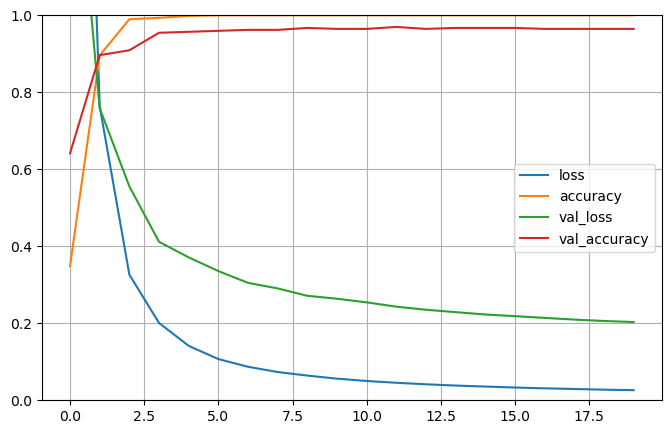

9/9 [==============================] - 0s 11ms/step - loss: 0.0998 - accuracy: 0.9783


In [195]:
model = Sequential()
model.add(Dense(5000,input_dim = 193,  kernel_initializer = 'glorot_normal', activation = 'selu'))
model.add(Dense(2500,input_dim = 193,  kernel_initializer = 'glorot_normal', activation = 'selu'))
model.add(Dense(1000,input_dim = 193,  kernel_initializer = 'glorot_normal', activation = 'selu'))
model.add(Dense(99, activation = 'softmax'))
                                                                                                                                                            
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

fit = model.fit(x_train_cv, y_train_cv, epochs = 20, validation_data = (x_valid_cv, y_valid_cv)) 

pd.DataFrame(fit.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

score = model.evaluate(x_test_cv, y_test_cv)

#### Model 2

Epoch 1/20
19/19 [==============================] - 1s 14ms/step - loss: 4.3066 - accuracy: 0.0859 - val_loss: 3.8771 - val_accuracy: 0.2017
Epoch 2/20
19/19 [==============================] - 0s 8ms/step - loss: 3.4249 - accuracy: 0.3838 - val_loss: 3.2506 - val_accuracy: 0.3866
Epoch 3/20
19/19 [==============================] - 0s 9ms/step - loss: 2.7402 - accuracy: 0.6044 - val_loss: 2.7491 - val_accuracy: 0.5126
Epoch 4/20
19/19 [==============================] - 0s 8ms/step - loss: 2.2051 - accuracy: 0.7407 - val_loss: 2.3617 - val_accuracy: 0.6218
Epoch 5/20
19/19 [==============================] - 0s 7ms/step - loss: 1.7923 - accuracy: 0.8283 - val_loss: 2.0368 - val_accuracy: 0.6891
Epoch 6/20
19/19 [==============================] - 0s 5ms/step - loss: 1.4713 - accuracy: 0.8754 - val_loss: 1.7665 - val_accuracy: 0.7731
Epoch 7/20
19/19 [==============================] - 0s 6ms/step - loss: 1.2209 - accuracy: 0.9242 - val_loss: 1.5520 - val_accuracy: 0.8067
Epoch 8/20
19/19 [=

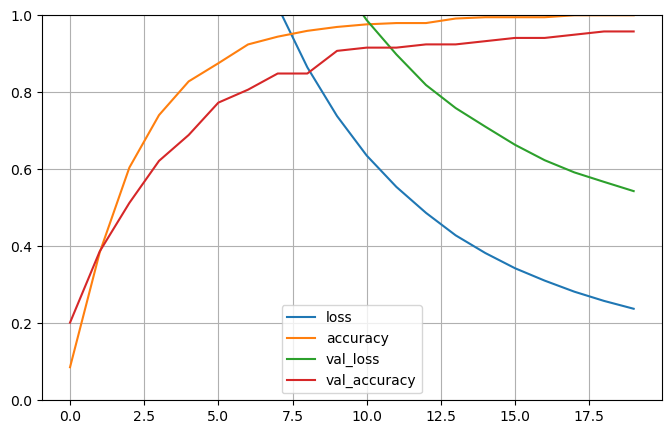

9/9 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.9567


In [187]:
model = Sequential()
model.add(Dense(1000,input_dim = 193,  kernel_initializer = 'glorot_normal', activation = 'elu'))
model.add(Dense(750,input_dim = 193,  kernel_initializer = 'glorot_normal', activation = 'elu'))
model.add(Dense(500,input_dim = 193,  kernel_initializer = 'glorot_normal', activation = 'elu'))
model.add(Dense(99, activation = 'softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

fit = model.fit(x_train_cv, y_train_cv, epochs = 20, validation_data = (x_valid_cv, y_valid_cv)) 

pd.DataFrame(fit.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

score = model.evaluate(x_test_cv, y_test_cv)

#### Model 3

Epoch 1/20
19/19 [==============================] - 1s 31ms/step - loss: 4.3651 - accuracy: 0.0875 - val_loss: 3.8815 - val_accuracy: 0.1849
Epoch 2/20
19/19 [==============================] - 0s 10ms/step - loss: 3.4669 - accuracy: 0.3266 - val_loss: 3.2741 - val_accuracy: 0.3697
Epoch 3/20
19/19 [==============================] - 0s 6ms/step - loss: 2.7762 - accuracy: 0.5875 - val_loss: 2.7964 - val_accuracy: 0.4958
Epoch 4/20
19/19 [==============================] - 0s 5ms/step - loss: 2.2430 - accuracy: 0.7155 - val_loss: 2.4132 - val_accuracy: 0.5882
Epoch 5/20
19/19 [==============================] - 0s 5ms/step - loss: 1.8274 - accuracy: 0.7929 - val_loss: 2.1100 - val_accuracy: 0.6555
Epoch 6/20
19/19 [==============================] - 0s 5ms/step - loss: 1.5025 - accuracy: 0.8569 - val_loss: 1.8494 - val_accuracy: 0.7143
Epoch 7/20
19/19 [==============================] - 0s 5ms/step - loss: 1.2489 - accuracy: 0.9158 - val_loss: 1.6354 - val_accuracy: 0.7647
Epoch 8/20
19/19 [

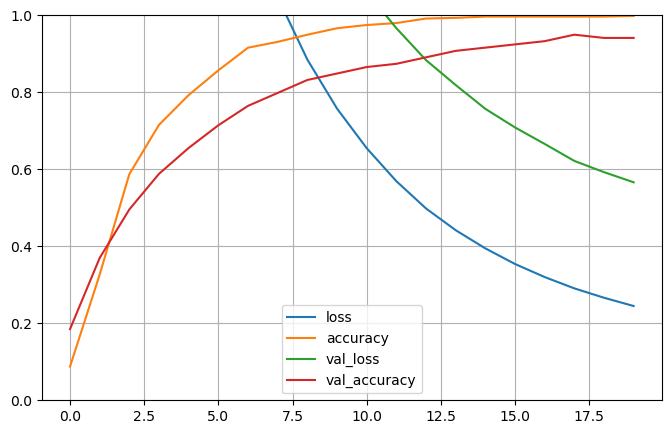

9/9 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.9422


In [185]:
model = Sequential()
model.add(Dense(1000,input_dim = 193,  kernel_initializer = 'glorot_normal', activation = 'relu'))
model.add(Dense(750,input_dim = 193,  kernel_initializer = 'glorot_normal', activation = 'relu'))
model.add(Dense(500,input_dim = 193,  kernel_initializer = 'glorot_normal', activation = 'relu'))
model.add(Dense(99, activation = 'softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

fit = model.fit(x_train_cv, y_train_cv, epochs = 20, validation_data = (x_valid_cv, y_valid_cv)) 

pd.DataFrame(fit.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

score = model.evaluate(x_test_cv, y_test_cv)